In [61]:
### importing the necessary packages to organize my data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [62]:
#importing the dataset
data = pd.read_csv("spotify.csv")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [63]:
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [64]:
data = data.fillna(data.mean())

TypeError: can only concatenate str (not "int") to str

In [ ]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Length: 114000, dtype: bool

In [ ]:
## drop unecessary datasets to avoid noise

data = data.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)


In [ ]:
data = data.drop('track_genre', axis=1)

In [ ]:
#encode non numeric column

data['explicit'] = data['explicit'].astype(int)


In [ ]:
#confirm numeric datatype 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  int64  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.0 MB


In [ ]:
#importing the necessary libraries for training the model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Linear Regression
simple linear Regression


Goal → Predict popularity of a song using only one independent variable (which is in this case danceability)

In [ ]:
#dependent variable is popularity and the independent variable is dancability


X = data[['danceability']]  # independent variable
y = data['popularity']      # dependent variable

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Make predictions
y_pred = LinearRegression_model.predict(X_test)

In [ ]:
# Evaluate the LinearRegression_model
print("Simple Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Intercept:", LinearRegression_model.intercept_)
print("Coefficient:", LinearRegression_model.coef_)

Simple Linear Regression Results:
R² Score: 0.0011553785059958965
Mean Squared Error: 492.91072806250645
Intercept: 30.69102753765631
Coefficient: [4.57060806]


ValueError: x and y must be the same size

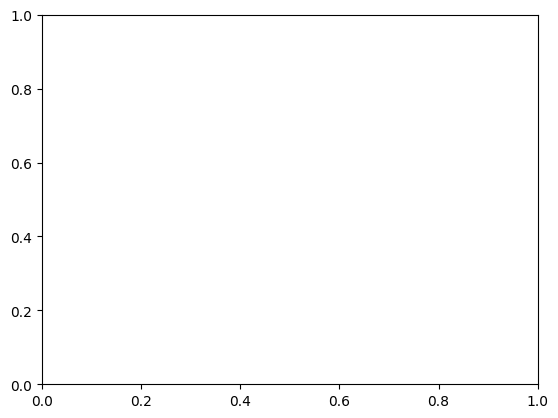

In [ ]:

# visualize the regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')
plt.legend()
plt.show()

In [ ]:
X.corr()

,danceability
danceability,1.0


### Multiple Linear Regression

Goal → Predict popularity using many features (like danceability, energy, valence, etc.)

In [ ]:
X = data[['danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'explicit',
        'mode', 'time_signature']]
y = data['popularity']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create and train the model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Evaluate the LinearRegression_model
print("Simple Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Intercept:", LinearRegression_model.intercept_)
print("Coefficient:", LinearRegression_model.coef_)

Simple Linear Regression Results:
R² Score: 0.0011553785059958965
Mean Squared Error: 492.91072806250645
Intercept: 33.24379014454423
Coefficient: [ 7.98150357e+00 -3.17862789e+00  1.04511205e-01 -1.51322927e+01
 -1.09066768e+00 -8.06188254e+00  1.56927317e+00 -9.47328248e+00
  1.48487584e-02 -1.87164488e-06  3.52169670e+00 -7.31040727e-01
  1.08618230e+00]


### Descision Tree Regressor

Goal → Use a non-linear model and compare its performance.

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train, y_train)
y_pred_tr = tree.predict(X_test)
mae_tr = mean_absolute_error(y_test, y_pred_tr)
mse_tr = mean_squared_error(y_test, y_pred_tr)
rmse_tr = root_mean_squared_error(y_test, y_pred_tr)
r2_tr = r2_score(y_test, y_pred_tr)
print(f'MAE: {mae_tr:.4f} \nMSE: {mse_tr:.4f} \nRMSE: {rmse_tr:.4f} \nR2: {r2_tr:.2f}') 

MAE: 17.8326 
MSE: 467.0024 
RMSE: 21.6102 
R2: 0.05


In [67]:

# Get feature names from X_train
feature_names = X_train.columns  # <- THIS WAS MISSING

# Get feature importances from the trained tree
importances = tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


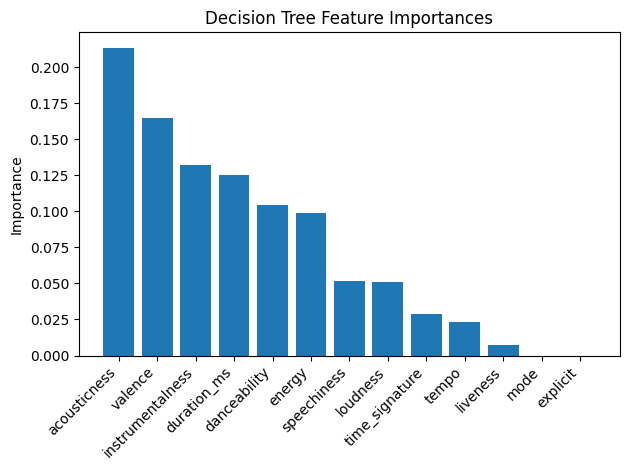

In [68]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()